In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
train_data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
Sale_Price=train_data.iloc[:,80]# сохранение результата в Sale_Price


In [12]:
train=train_data.drop(["SalePrice"],axis=1)#удаление столбца SalePrice
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
data= pd.concat([train,test], keys=['x', 'y'])#здесь X - данные обучения, а данные Y - тестирования.
data=data.drop(["Id"],axis=1)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='None-None'>

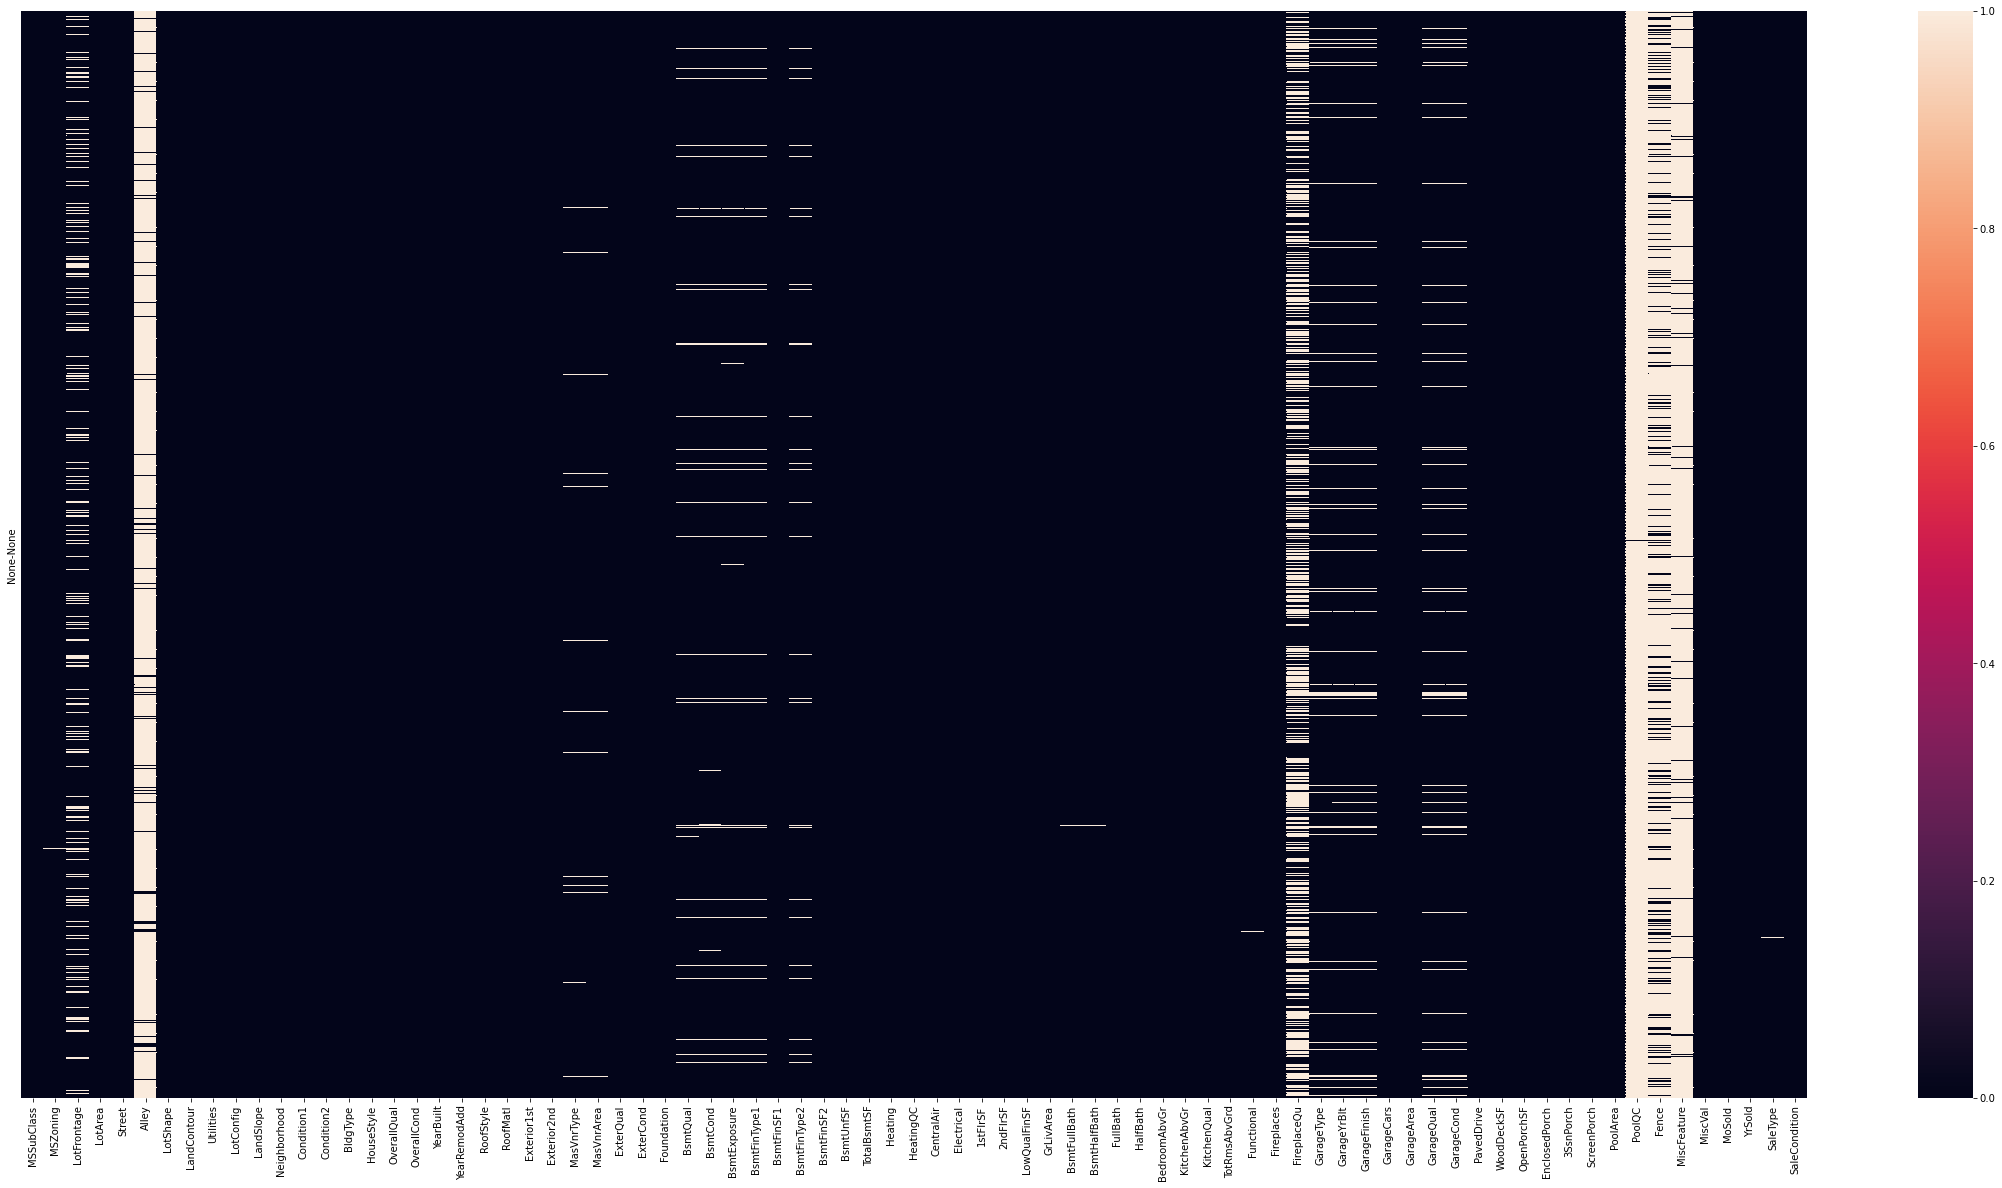

In [16]:
plt.figure(figsize=(40,20))
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='rocket')

In [17]:
total_null = data.isnull().sum().sort_values(ascending=False) #суммируем и упорядочиваем все нулевые значения переменной
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) #получаем процент
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


In [18]:
data = data.drop((missing_data[missing_data["Percentage"] > 0.05]).index,1) #нули выкидываем

data.isnull().sum()

MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 68, dtype: int64

In [19]:
num_col=data._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [20]:
cat_col=set(data.columns)-set(num_col) #нашли важные фичи
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [21]:
for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)

In [22]:
for col in cat_col:

    data[col].fillna(data[col].mode()[0],inplace=True)

In [23]:
for i in cat_col:
    print(data[i].value_counts())

No    1986
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Y    2723
N     196
Name: CentralAir, dtype: int64
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64
SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
TA    1364
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64
TA    1798
Gd     979
Ex     107
Fa   

In [24]:
df=data.drop(["RoofMatl","Heating","Condition2","BsmtCond","CentralAir","Functional","Electrical",
              "LandSlope","ExterCond","Condition1","GarageArea","BsmtUnfSF","3SsnPorch","MiscVal",
              "BsmtFinType2","Utilities","Street","Exterior2nd","Neighborhood"],axis=1) #отбрасываем некоторые ненужные фичи ибо они не могут повлиять на оценку

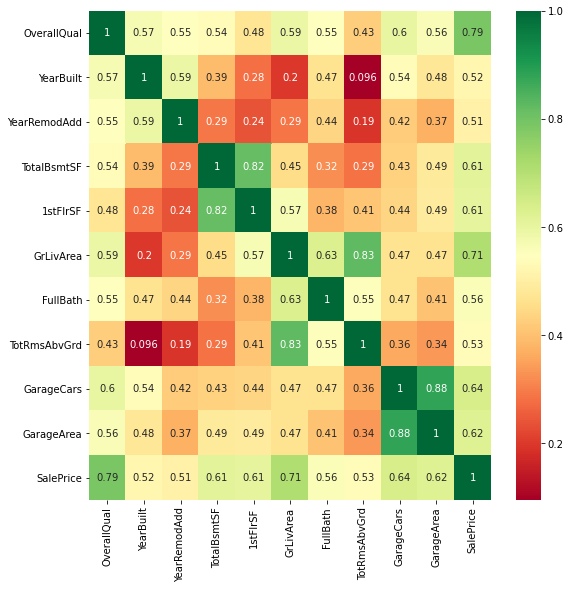

In [25]:
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
var = train_data[train_data.columns[1:]].corr()['SalePrice'][:]
var.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [27]:
df=df.drop(["MoSold","BsmtFinSF2","BsmtHalfBath","OverallCond","YrSold",
            "MSSubClass","EnclosedPorch","KitchenAbvGr","ScreenPorch","2ndFlrSF","OverallQual","GrLivArea"],axis=1)

In [28]:
df.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,PoolArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,1971.312778,1984.264474,102.201312,441.423235,1051.777587,1159.581706,4.694416,0.429894,1.568003,0.380267,2.860226,6.451524,0.597122,1.766621,93.709832,47.486811,2.251799
std,7886.996359,30.291442,20.894344,178.626089,455.532750,440.690726,392.362079,46.396825,0.524556,0.552969,0.502872,0.822693,1.569379,0.646129,0.761494,126.526589,67.575493,35.663946
min,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7478.000000,1953.500000,1965.000000,0.000000,0.000000,793.000000,876.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9453.000000,1973.000000,1993.000000,0.000000,369.000000,990.000000,1082.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,0.000000,26.000000,0.000000
75%,11570.000000,2001.000000,2004.000000,163.500000,733.000000,1302.000000,1387.500000,0.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,168.000000,70.000000,0.000000
max,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,5095.000000,1064.000000,3.000000,4.000000,2.000000,8.000000,15.000000,4.000000,5.000000,1424.000000,742.000000,800.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness coeff. is: 1.882876
Kurtosis coeff. is: 6.536282


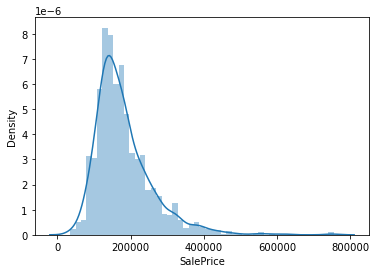

In [29]:
sns.distplot(train_data['SalePrice']);
print("Skewness coeff. is: %f" % train_data['SalePrice'].skew())
print("Kurtosis coeff. is: %f" % train_data['SalePrice'].kurt())

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

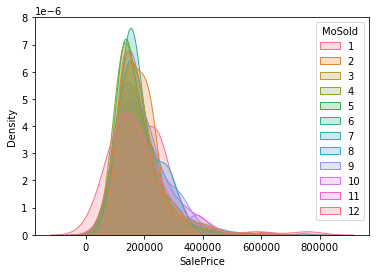

In [30]:
sns.kdeplot(data=train_data,x='SalePrice',hue="MoSold",fill=True,common_norm=False,palette="husl")

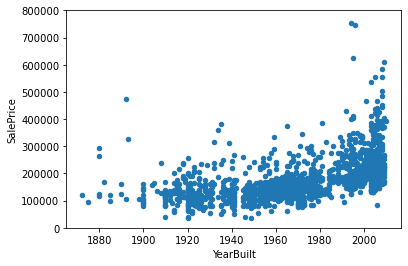

In [31]:
data_year_trend = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
data_year_trend.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000));

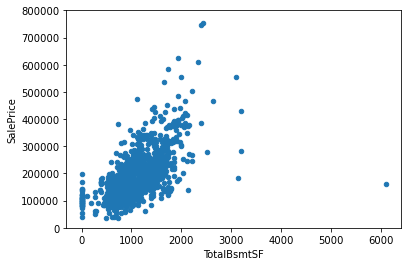

In [32]:
data_bsmt_trend = pd.concat([train_data['SalePrice'], train_data['TotalBsmtSF']], axis=1)
data_bsmt_trend.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

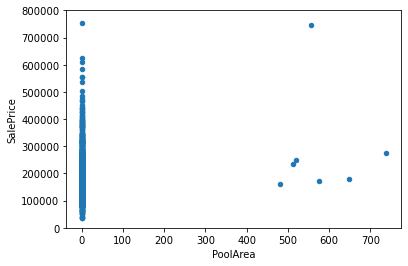

In [33]:
data_PoolArea_trend = pd.concat([train_data['SalePrice'], train_data['PoolArea']], axis=1)
data_PoolArea_trend.plot.scatter(x='PoolArea', y='SalePrice', ylim=(0,800000));

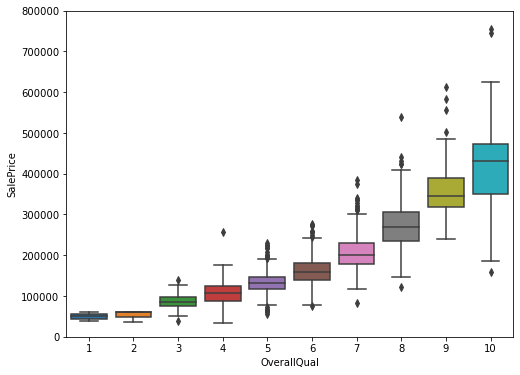

In [34]:
data = pd.concat([train_data['SalePrice'], train_data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

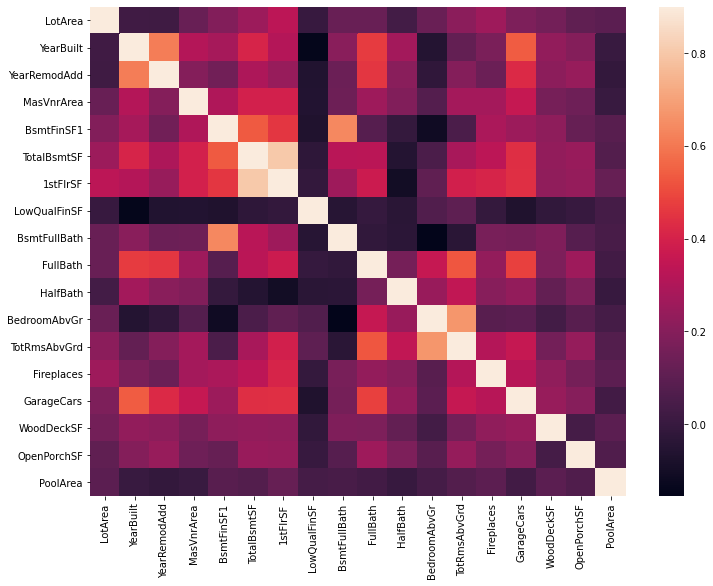

In [35]:
corr_matrix = df.corr()
f, ax1 = plt.subplots(figsize=(12,9)) 
ax1=sns.heatmap(corr_matrix,vmax = 0.9); 

Здесь мы извлекаем числовые переменные, это пригодится позже.

In [36]:
n_features = df.select_dtypes(exclude = ["object"]).columns

In [51]:
# from sklearn.preprocessing import StandartScaler
# scaler=StandardScaler()
# X[X.columns] = scaler.fit_transform(X[X.columns])

ImportError: cannot import name 'StandartScaler' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [37]:
X=pd.get_dummies(df)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

Обучение данных после предварительной обработки

In [40]:
Train_data=X.loc["x"]


In [41]:
Test_data=X.loc["y"]


сюда добавляем столбец salePrice в данные обучения

In [42]:
Train_data.insert(2,column="SalePrice",value=Sale_Price)
Train_data.head()

,LotArea,YearBuilt,SalePrice,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.217879,1.046258,208500,0.896833,0.525202,0.580907,-0.444328,-0.773861,-0.101197,1.087023,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.072044,0.154764,181500,-0.395604,-0.572250,1.178112,0.477111,0.261075,-0.101197,-0.819679,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.137197,0.980221,223500,0.848965,0.334828,0.097873,-0.299076,-0.610718,-0.101197,1.087023,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.078385,-1.859351,140000,-0.682812,-0.572250,-0.494941,-0.671283,-0.506205,-0.101197,1.087023,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.518903,0.947203,250000,0.753229,1.387486,0.468931,0.211573,-0.037170,-0.101197,1.087023,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


здесь мы разделяем данные на вход (x) и выход (y)

In [43]:
x=Train_data.drop(["SalePrice"],axis=True)
y=Train_data["SalePrice"]


разделение данных обучения для модели обучения и оценки читов

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators = 50,random_state=40,
                          min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001,min_samples_split=5)
rfr.fit(x_train,y_train)
y_predictrfr = rfr.predict(x_test)

#здесь мы можем проверить нашу модель

print(rfr.score(x_test,y_test))

0.8557799484711797


In [46]:
import math

In [47]:
from sklearn.metrics import mean_squared_error, make_scorer

In [48]:
Test_data.head()#здесь мы видим тестовые данные, здесь отсутствует один столбец, это Saleprice, который необходимо предсказать

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,BsmtFullBath,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.184371,-0.340510,-1.113625,-0.572250,0.058352,-0.385319,-0.671897,-0.101197,-0.819679,-1.027363,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.519791,-0.439565,-1.257229,0.032468,1.057354,0.629171,0.431865,-0.101197,-0.819679,-1.027363,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.464374,0.848148,0.657493,-0.572250,0.767534,-0.280920,-0.590326,-0.101197,-0.819679,0.781366,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.024109,0.881166,0.657493,-0.460265,0.352564,-0.285459,-0.595424,-0.101197,-0.819679,0.781366,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-0.654748,0.683057,0.370284,-0.572250,-0.391747,0.517963,0.306959,-0.101197,-0.819679,0.781366,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


здесь мы прогнозируем SalePrice с использованием модели RFR

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [56]:
y_model_prerfc = lin_reg.predict(Test_data)

предсказанное

In [57]:
y_model_prerfc=np.around(y_model_prerfc,2)
y_model_prerfc

array([109492., 156492., 191668., ..., 162724., 124020., 219348.])

In [58]:
prediction=np.array(y_model_prerfc).tolist()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
test.insert(1,column="SalePrice",value=prediction)
test.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,109492.0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,156492.0,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,191668.0,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,200820.0,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,176388.0,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
predict_sub=test.drop(test.iloc[:,2:],axis=1)
predict_sub.head()

,Id,SalePrice
0,1461,109492.0
1,1462,156492.0
2,1463,191668.0
3,1464,200820.0
4,1465,176388.0
